In [1]:
from model import *
from mesa.batchrunner import BatchRunner

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for pre-processing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.utils import shuffle

#feature selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

#for model construction
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

#for parameter optimization and model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, cross_val_score

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [14]:
number_of_steps = 10

columns = ['Infected' + str(n) for n in range(0,10,1)] + ['Resistant' + str(n) for n in range(0,10,1)] + ['Susceptible' + str(n) for n in range(0,10,1)]
columns.append('target')
dataset = pd.DataFrame([],columns = columns)

for iteration in range(50):
    
    model = VirusOnNetwork()
    number_agents = np.zeros((3,number_of_steps))
   
    for i in range(number_of_steps):
        # Store the number of infected
        number_agents[0,i] = number_infected(model)
        number_agents[1,i] = number_resistant(model)
        number_agents[2,i] = number_susceptible(model)
        model.step()
    
    #target
    reshape_data = np.reshape(number_agents,(1,3*number_of_steps))
    reshape_data = np.append(reshape_data,[1])
    dataset = pd.concat([dataset,pd.DataFrame([reshape_data],columns = columns)])

In [15]:
dataset.head()

,Infected0,Infected1,Infected2,Infected3,Infected4,Infected5,Infected6,Infected7,Infected8,Infected9,...,Susceptible1,Susceptible2,Susceptible3,Susceptible4,Susceptible5,Susceptible6,Susceptible7,Susceptible8,Susceptible9,target
0,2.0,9.0,17.0,50.0,99.0,218.0,441.0,751.0,1114.0,1443.0,...,1946.0,1896.0,1827.0,1730.0,1569.0,1322.0,1004.0,647.0,330.0,1.0
0,2.0,5.0,13.0,43.0,113.0,248.0,523.0,867.0,1238.0,1524.0,...,1954.0,1914.0,1847.0,1742.0,1568.0,1272.0,917.0,550.0,276.0,1.0
0,2.0,5.0,10.0,22.0,49.0,104.0,221.0,473.0,823.0,1176.0,...,1951.0,1905.0,1854.0,1787.0,1697.0,1548.0,1267.0,922.0,567.0,1.0
0,2.0,7.0,9.0,30.0,59.0,133.0,284.0,564.0,929.0,1302.0,...,1955.0,1914.0,1865.0,1804.0,1699.0,1519.0,1214.0,831.0,472.0,1.0
0,2.0,3.0,7.0,11.0,39.0,103.0,223.0,433.0,730.0,1120.0,...,1953.0,1903.0,1873.0,1803.0,1711.0,1554.0,1325.0,1013.0,632.0,1.0
0,2.0,2.0,3.0,11.0,31.0,86.0,190.0,395.0,694.0,1069.0,...,1966.0,1916.0,1866.0,1817.0,1729.0,1596.0,1365.0,1060.0,678.0,1.0
0,2.0,4.0,11.0,25.0,50.0,128.0,264.0,526.0,865.0,1251.0,...,1962.0,1909.0,1865.0,1804.0,1696.0,1530.0,1248.0,908.0,516.0,1.0
0,2.0,8.0,19.0,31.0,64.0,151.0,346.0,642.0,983.0,1344.0,...,1955.0,1899.0,1848.0,1774.0,1649.0,1424.0,1106.0,756.0,408.0,1.0
0,2.0,6.0,17.0,40.0,73.0,162.0,351.0,663.0,1080.0,1396.0,...,1936.0,1884.0,1824.0,1751.0,1632.0,1413.0,1083.0,663.0,364.0,1.0
0,2.0,6.0,13.0,33.0,78.0,175.0,380.0,680.0,1039.0,1362.0,...,1949.0,1901.0,1848.0,1761.0,1642.0,1411.0,1098.0,735.0,423.0,1.0


In [20]:
dataset.to_csv('dataset_move',index=False)

In [21]:
dataset_move = pd.read_csv('dataset_move')
dataset_unmove = pd.read_csv('dataset_unmove')
dataset_unmove = dataset_unmove.drop('maximum',axis = 1)
dataset_unmove['target'] = 0
dataset_unmove = dataset_unmove.sample(n = 50)

In [35]:
dataset_unmove.head()

,Infected0,Infected1,Infected2,Infected3,Infected4,Infected5,Infected6,Infected7,Infected8,Infected9,...,Susceptible1,Susceptible2,Susceptible3,Susceptible4,Susceptible5,Susceptible6,Susceptible7,Susceptible8,Susceptible9,target
47,2.0,5.0,7.0,22.0,26.0,40.0,64.0,97.0,141.0,219.0,...,1961.0,1920.0,1876.0,1827.0,1780.0,1715.0,1647.0,1562.0,1461.0,0
4,2.0,4.0,13.0,18.0,29.0,40.0,65.0,109.0,166.0,247.0,...,1948.0,1909.0,1871.0,1815.0,1766.0,1712.0,1628.0,1543.0,1430.0,0
62,2.0,5.0,11.0,13.0,20.0,30.0,40.0,62.0,101.0,143.0,...,1947.0,1901.0,1866.0,1835.0,1789.0,1745.0,1673.0,1604.0,1528.0,0
29,2.0,4.0,5.0,12.0,21.0,36.0,54.0,93.0,163.0,246.0,...,1957.0,1909.0,1876.0,1824.0,1781.0,1713.0,1645.0,1545.0,1429.0,0
44,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0,...,1952.0,1909.0,1859.0,1814.0,1777.0,1745.0,1719.0,1691.0,1665.0,0


In [40]:
dataset = pd.concat([dataset_unmove,dataset_move])

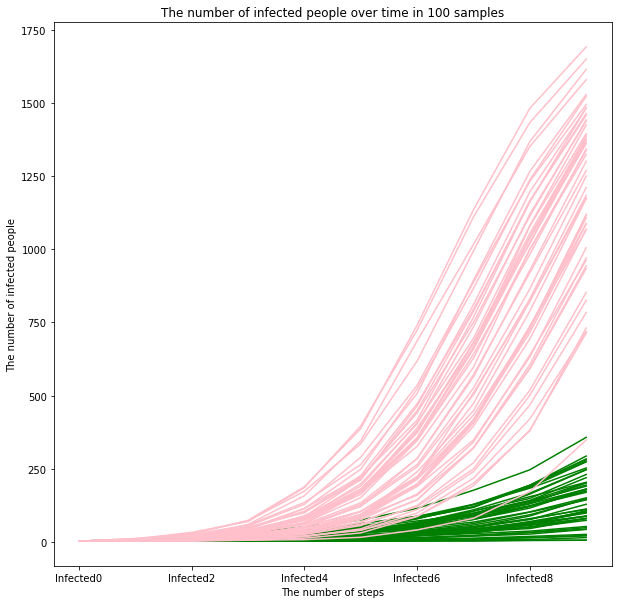

In [80]:
ax = dataset[dataset['target']==0].T[:10].plot(legend = False, figsize = (10,10), 
                                     xlabel = 'The number of steps', 
                                     ylabel = 'The number of infected people',
                                     title = 'The number of infected people over time in 100 samples',
                        label = 'unmove',color = 'Green')

dataset[dataset['target']==1].T[:10].plot(legend = False, figsize = (10,10),
                        label = 'move',color = 'Pink',ax=ax)

plt.savefig('InfectedNum_move.png', bbox_inches='tight', dpi=300)
plt.show()

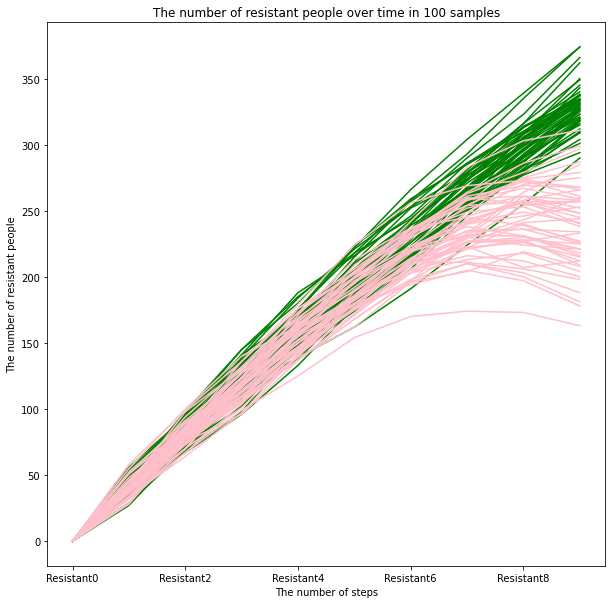

In [81]:
ax = dataset[dataset['target']==0].T[10:20].plot(legend = False, figsize = (10,10), 
                                     xlabel = 'The number of steps', 
                                     ylabel = 'The number of resistant people',
                                     title = 'The number of resistant people over time in 100 samples',
                        label = 'unmove',color = 'Green')

dataset[dataset['target']==1].T[10:20].plot(legend = False, figsize = (10,10),
                        label = 'move',color = 'Pink',ax=ax)

plt.savefig('ResistantNum_move.png', bbox_inches='tight', dpi=300)
plt.show()

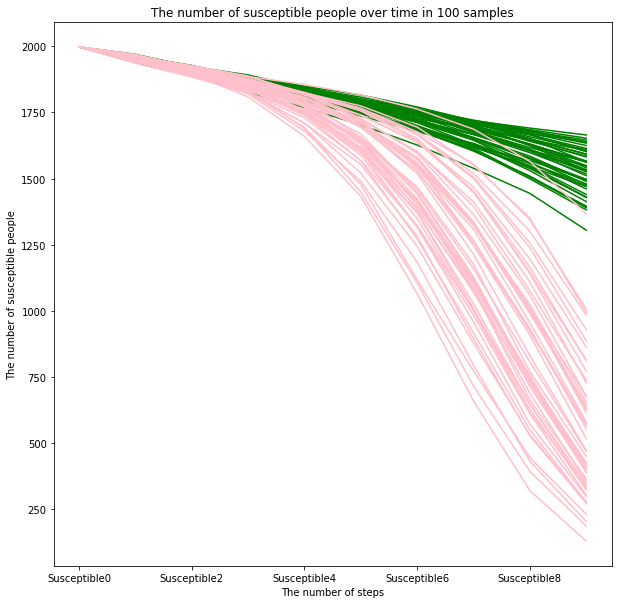

In [82]:
ax = dataset[dataset['target']==0].T[20:30].plot(legend = False, figsize = (10,10), 
                                     xlabel = 'The number of steps', 
                                     ylabel = 'The number of susceptible people',
                                     title = 'The number of susceptible people over time in 100 samples',
                        label = 'unmove',color = 'Green')

dataset[dataset['target']==1].T[20:30].plot(legend = False, figsize = (10,10),
                        label = 'move',color = 'Pink',ax=ax)

plt.savefig('SusceptNum_move.png', bbox_inches='tight', dpi=300)
plt.show()

## Data Cleaning

In [68]:
dataset = shuffle(dataset)

# generate dataset
X0, y0 = dataset.drop('target', axis = 1), dataset['target']

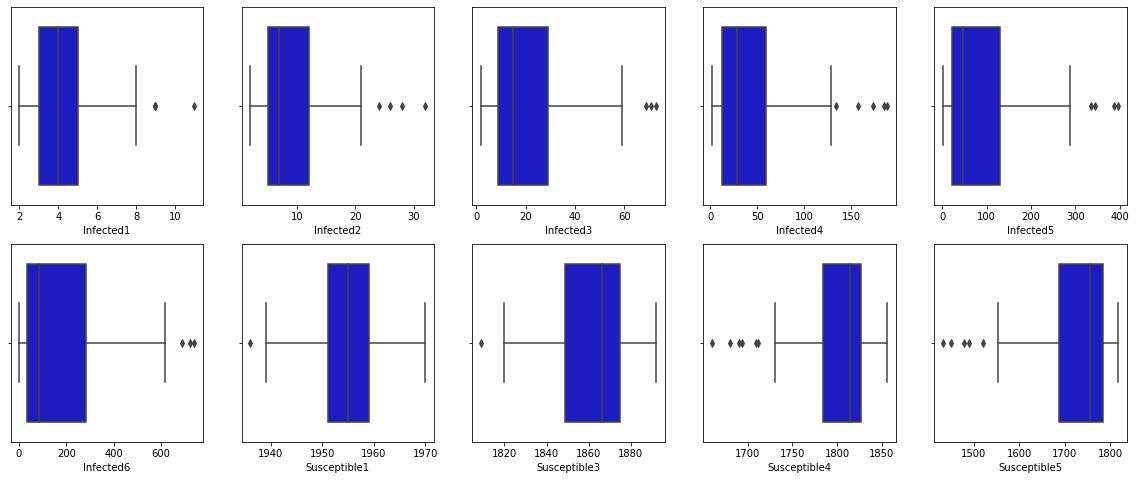

In [83]:
colors = ["#0101DF", "#DF0101"]

f, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Infected1", data=X0, palette=colors, ax=axes[0,0])

sns.boxplot(x="Infected2", data=X0, palette=colors, ax=axes[0,1])

sns.boxplot(x="Infected3", data=X0, palette=colors, ax=axes[0,2])

sns.boxplot(x="Infected4", data=X0, palette=colors, ax=axes[0,3])

sns.boxplot(x="Infected5", data=X0, palette=colors, ax=axes[0,4])

sns.boxplot(x="Infected6", data=X0, palette=colors, ax=axes[1,0])

sns.boxplot(x="Susceptible1", data=X0, palette=colors, ax=axes[1,1])

sns.boxplot(x="Susceptible3", data=X0, palette=colors, ax=axes[1,2])

sns.boxplot(x="Susceptible4", data=X0, palette=colors, ax=axes[1,3])

sns.boxplot(x="Susceptible5", data=X0, palette=colors, ax=axes[1,4])

plt.savefig('boxplots_move.png', bbox_inches='tight', dpi=300)

plt.show()

In [207]:
Q1 = X0.quantile(0.25)
Q3 = X0.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X = X0[~((X0 < (Q1 - 1.5 * IQR)) |(X0 > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y0[~((X0 < (Q1 - 1.5 * IQR)) |(X0 > (Q3 + 1.5 * IQR))).any(axis=1)]

Infected0          0.00
Infected1          2.00
Infected2          7.00
Infected3         20.25
Infected4         46.00
Infected5        106.50
Infected6        248.25
Infected7        510.00
Infected8        831.25
Infected9       1133.50
Resistant0         0.00
Resistant1         9.00
Resistant2        12.00
Resistant3        14.25
Resistant4        20.25
Resistant5        21.00
Resistant6        22.25
Resistant7        32.25
Resistant8        54.00
Resistant9        87.50
Susceptible0       0.00
Susceptible1       8.00
Susceptible2      15.00
Susceptible3      26.25
Susceptible4      42.00
Susceptible5      98.00
Susceptible6     233.00
Susceptible7     476.50
Susceptible8     784.50
Susceptible9    1061.25
dtype: float64


In [85]:
print(X.shape)
print(y.shape)
print(sum(y))

(91, 30)
(91,)
41.0


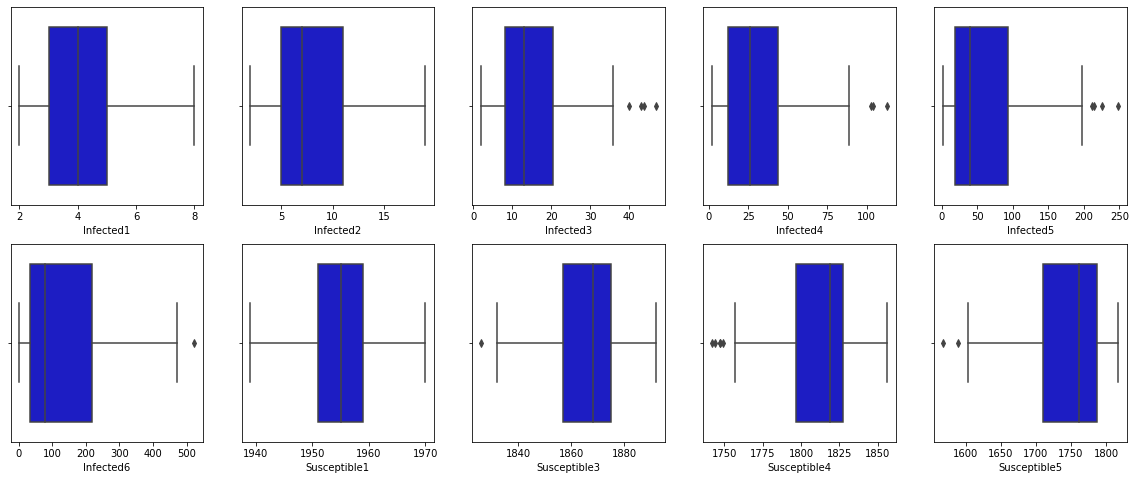

In [84]:
colors = ["#0101DF", "#DF0101"]

f, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Infected1", data=X, palette=colors, ax=axes[0,0])

sns.boxplot(x="Infected2", data=X, palette=colors, ax=axes[0,1])

sns.boxplot(x="Infected3", data=X, palette=colors, ax=axes[0,2])

sns.boxplot(x="Infected4", data=X, palette=colors, ax=axes[0,3])

sns.boxplot(x="Infected5", data=X, palette=colors, ax=axes[0,4])

sns.boxplot(x="Infected6", data=X, palette=colors, ax=axes[1,0])

sns.boxplot(x="Susceptible1", data=X, palette=colors, ax=axes[1,1])

sns.boxplot(x="Susceptible3", data=X, palette=colors, ax=axes[1,2])

sns.boxplot(x="Susceptible4", data=X, palette=colors, ax=axes[1,3])

sns.boxplot(x="Susceptible5", data=X, palette=colors, ax=axes[1,4])

plt.savefig('boxplots_moveafter.png', bbox_inches='tight', dpi=300)

plt.show()

# Feature selection

In [184]:
features_best = []
#split train and test data

num_features_opt = 10   # the number of features that we need to choose as a result
num_features_max = 15   # the somewhat excessive number of features, which we will choose at each stage

## Pearson Correlation

In [113]:
df = X.copy()
df['target'] = list(y)
df

,Infected0,Infected1,Infected2,Infected3,Infected4,Infected5,Infected6,Infected7,Infected8,Infected9,...,Susceptible1,Susceptible2,Susceptible3,Susceptible4,Susceptible5,Susceptible6,Susceptible7,Susceptible8,Susceptible9,target
17,2.0,5.0,13.0,29.0,66.0,173.0,355.0,659.0,1025.0,1366.0,...,1955.0,1912.0,1875.0,1797.0,1656.0,1442.0,1120.0,747.0,425.0,1.0
42,2.0,2.0,4.0,6.0,17.0,44.0,110.0,240.0,468.0,784.0,...,1960.0,1926.0,1874.0,1817.0,1757.0,1667.0,1506.0,1257.0,929.0,1.0
57,2.0,6.0,10.0,16.0,29.0,40.0,55.0,89.0,122.0,169.0,...,1953.0,1907.0,1858.0,1804.0,1745.0,1688.0,1625.0,1568.0,1497.0,0.0
69,2.0,8.0,13.0,17.0,23.0,38.0,57.0,86.0,130.0,180.0,...,1940.0,1894.0,1842.0,1789.0,1746.0,1697.0,1628.0,1557.0,1480.0,0.0
43,2.0,3.0,5.0,11.0,31.0,67.0,143.0,321.0,592.0,935.0,...,1956.0,1921.0,1884.0,1825.0,1756.0,1644.0,1448.0,1147.0,813.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2.0,7.0,10.0,19.0,32.0,54.0,81.0,117.0,193.0,293.0,...,1955.0,1917.0,1870.0,1825.0,1766.0,1697.0,1631.0,1530.0,1413.0,0.0
21,2.0,8.0,10.0,30.0,73.0,173.0,389.0,665.0,1043.0,1389.0,...,1953.0,1909.0,1856.0,1775.0,1648.0,1399.0,1105.0,733.0,390.0,1.0
87,2.0,4.0,5.0,12.0,19.0,31.0,50.0,76.0,115.0,179.0,...,1959.0,1918.0,1868.0,1837.0,1794.0,1744.0,1678.0,1605.0,1511.0,0.0
13,2.0,7.0,14.0,36.0,83.0,181.0,378.0,681.0,1020.0,1374.0,...,1941.0,1895.0,1837.0,1757.0,1615.0,1389.0,1070.0,727.0,388.0,1.0


In [183]:
df['Infected1'].std()

1.6218140553962503

In [123]:
# Step1:Pearson correlation coefficient
corr = abs(df.corr()["target"]).sort_values(ascending=False)[1:]
# absolute for positive values

# random threshold for features to keep
relevant_features = corr[:15]
relevant_features

Susceptible9    0.936689
Infected9       0.936522
Infected8       0.893998
Susceptible8    0.891790
Resistant9      0.873472
Infected7       0.846266
Susceptible7    0.840698
Resistant8      0.799334
Infected6       0.790862
Susceptible6    0.777280
Infected5       0.747128
Susceptible5    0.717979
Infected4       0.673471
Resistant7      0.630414
Susceptible4    0.588530
Name: target, dtype: float64

In [128]:
corr

Susceptible9    0.936689
Infected9       0.936522
Infected8       0.893998
Susceptible8    0.891790
Resistant9      0.873472
Infected7       0.846266
Susceptible7    0.840698
Resistant8      0.799334
Infected6       0.790862
Susceptible6    0.777280
Infected5       0.747128
Susceptible5    0.717979
Infected4       0.673471
Resistant7      0.630414
Susceptible4    0.588530
Infected3       0.561550
Resistant6      0.366777
Infected2       0.331765
Susceptible3    0.285399
Resistant5      0.237884
Resistant3      0.176133
Infected1       0.147170
Resistant4      0.140235
Resistant1      0.128098
Susceptible1    0.086815
Resistant2      0.085433
Susceptible2    0.067578
Infected0            NaN
Resistant0           NaN
Susceptible0         NaN
Name: target, dtype: float64

In [194]:
features_best.append(relevant_features.index.tolist())

In [100]:
# Step2: the SelectKBest with Chi-2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print('The top 15 highest Chi-2 score features: ')
print(featureScores.nlargest(num_features_max,'Score')['Feature'])

The top 15 highest Chi-2 score features: 
9        Infected9
8        Infected8
29    Susceptible9
7        Infected7
6        Infected6
28    Susceptible8
5        Infected5
27    Susceptible7
4        Infected4
26    Susceptible6
19      Resistant9
3        Infected3
18      Resistant8
25    Susceptible5
17      Resistant7
Name: Feature, dtype: object


In [145]:
featureScores

,Feature,Score
0,Infected0,2.019484e-30
1,Infected1,1.264438e+00
2,Infected2,2.126477e+01
3,Infected3,2.031989e+02
4,Infected4,8.751323e+02
5,Infected5,2.902059e+03
6,Infected6,7.631851e+03
7,Infected7,1.606018e+04
8,Infected8,2.723202e+04
9,Infected9,3.812277e+04


In [186]:
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())

In [156]:
# Step3: the SelectFromModel with LinearSVC
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_selected_df = pd.DataFrame(X_new, columns=[X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]])
print('The number of features that passed the LinearSVC: ', X_selected_df.shape[1])
features_best.append(X_selected_df.columns.tolist())
print(X_selected_df.columns)

The number of features that passed the LinearSVC:  9
Index(['Infected5', 'Infected6', 'Infected9', 'Resistant6', 'Resistant9',
       'Susceptible0', 'Susceptible1', 'Susceptible2', 'Susceptible9'],
      dtype='object')


In [187]:
features_best.append(X_selected_df.columns.tolist())

In [143]:
lsvc.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.14961537e-02, -1.48487683e-02,  0.00000000e+00,
        0.00000000e+00,  1.18550882e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.72469480e-03,  0.00000000e+00,  0.00000000e+00, -1.08414203e-03,
       -1.79199462e-04, -1.05805494e-04,  0.00000000e+00, -5.05548932e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.12402326e-04])

## Lasso

In [169]:
# Step4: the SelectFromModel with Lasso

lasso = LassoCV(cv=3).fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)
X_selected_df_Lasso = pd.DataFrame(X_new, columns=[X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]])
features_best.append(X_selected_df_Lasso.columns.tolist())
print('The number of features that passed the Lasso: ',X_selected_df_Lasso.shape[1])
print(X_selected_df_Lasso.columns)

The number of features that passed the Lasso:  5
Index(['Infected5', 'Infected9', 'Susceptible7', 'Susceptible8',
       'Susceptible9'],
      dtype='object')


In [188]:
features_best.append(X_selected_df_Lasso.columns.tolist())

In [103]:
# Step5: the Recursive Feature Elimination (RFE) with Logistic Regression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features by the Recursive Feature Elimination (RFE) with Logistic Regression')
rfe_feature

Fitting estimator with 30 features.
Fitting estimator with 20 features.
15 selected features by the Recursive Feature Elimination (RFE) with Logistic Regression


['Infected4',
 'Infected5',
 'Infected6',
 'Infected7',
 'Infected9',
 'Resistant5',
 'Resistant6',
 'Resistant7',
 'Resistant8',
 'Resistant9',
 'Susceptible0',
 'Susceptible5',
 'Susceptible6',
 'Susceptible7',
 'Susceptible9']

In [189]:
features_best.append(rfe_feature)

In [107]:
# Step6: the Recursive Feature Elimination (RFE) with Random Forest

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features by the Recursive Feature Elimination (RFE) with Random Forest')

embeded_rf_feature

14 selected features by the Recursive Feature Elimination (RFE) with Random Forest


['Infected5',
 'Infected6',
 'Infected7',
 'Infected8',
 'Infected9',
 'Resistant6',
 'Resistant7',
 'Resistant8',
 'Resistant9',
 'Susceptible5',
 'Susceptible6',
 'Susceptible7',
 'Susceptible8',
 'Susceptible9']

In [190]:
features_best.append(embeded_rf_feature)

In [180]:
# Step7: the VarianceThreshold

selector = VarianceThreshold(threshold=10)
selector.fit_transform(X)
print(X.columns[selector.get_support(indices=False)].shape[0], 'selected features by the VarianceThreshold')

26 selected features by the VarianceThreshold


In [191]:
features_best.append(list(np.array(X.columns)[selector.get_support(indices=False)]))

In [182]:
list(np.array(X.columns)[selector.get_support(indices=False)])

['Infected2',
 'Infected3',
 'Infected4',
 'Infected5',
 'Infected6',
 'Infected7',
 'Infected8',
 'Infected9',
 'Resistant1',
 'Resistant2',
 'Resistant3',
 'Resistant4',
 'Resistant5',
 'Resistant6',
 'Resistant7',
 'Resistant8',
 'Resistant9',
 'Susceptible1',
 'Susceptible2',
 'Susceptible3',
 'Susceptible4',
 'Susceptible5',
 'Susceptible6',
 'Susceptible7',
 'Susceptible8',
 'Susceptible9']

In [199]:
# Step8: List the most common items in all lists of optimal features

main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in X.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt[(df_main_cols_opt['Num']>0).tolist()].sort_values(by=['Num'], ascending=False)

,Num
Susceptible9,7
Infected5,7
Infected9,7
Infected6,6
Susceptible7,6
Resistant9,6
Resistant7,5
Susceptible8,5
Infected7,5
Susceptible6,5


In [201]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
main_cols

['Infected5',
 'Infected9',
 'Susceptible9',
 'Infected6',
 'Resistant9',
 'Susceptible7',
 'Infected7',
 'Resistant7',
 'Resistant8',
 'Susceptible5']

In [208]:
features_list = ['Infected5',
 'Infected9',
 'Susceptible9',
 'Infected6',
 'Resistant9',
 'Susceptible7',
 'Infected7',
 'Resistant7',
 'Resistant8',
 'Susceptible8']

## Modelling

In [300]:
X

,Infected0,Infected1,Infected2,Infected3,Infected4,Infected5,Infected6,Infected7,Infected8,Infected9,...,Susceptible0,Susceptible1,Susceptible2,Susceptible3,Susceptible4,Susceptible5,Susceptible6,Susceptible7,Susceptible8,Susceptible9
17,2.0,5.0,13.0,29.0,66.0,173.0,355.0,659.0,1025.0,1366.0,...,1998.0,1955.0,1912.0,1875.0,1797.0,1656.0,1442.0,1120.0,747.0,425.0
42,2.0,2.0,4.0,6.0,17.0,44.0,110.0,240.0,468.0,784.0,...,1998.0,1960.0,1926.0,1874.0,1817.0,1757.0,1667.0,1506.0,1257.0,929.0
57,2.0,6.0,10.0,16.0,29.0,40.0,55.0,89.0,122.0,169.0,...,1998.0,1953.0,1907.0,1858.0,1804.0,1745.0,1688.0,1625.0,1568.0,1497.0
69,2.0,8.0,13.0,17.0,23.0,38.0,57.0,86.0,130.0,180.0,...,1998.0,1940.0,1894.0,1842.0,1789.0,1746.0,1697.0,1628.0,1557.0,1480.0
43,2.0,3.0,5.0,11.0,31.0,67.0,143.0,321.0,592.0,935.0,...,1998.0,1956.0,1921.0,1884.0,1825.0,1756.0,1644.0,1448.0,1147.0,813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2.0,7.0,10.0,19.0,32.0,54.0,81.0,117.0,193.0,293.0,...,1998.0,1955.0,1917.0,1870.0,1825.0,1766.0,1697.0,1631.0,1530.0,1413.0
21,2.0,8.0,10.0,30.0,73.0,173.0,389.0,665.0,1043.0,1389.0,...,1998.0,1953.0,1909.0,1856.0,1775.0,1648.0,1399.0,1105.0,733.0,390.0
87,2.0,4.0,5.0,12.0,19.0,31.0,50.0,76.0,115.0,179.0,...,1998.0,1959.0,1918.0,1868.0,1837.0,1794.0,1744.0,1678.0,1605.0,1511.0
13,2.0,7.0,14.0,36.0,83.0,181.0,378.0,681.0,1020.0,1374.0,...,1998.0,1941.0,1895.0,1837.0,1757.0,1615.0,1389.0,1070.0,727.0,388.0


In [301]:
# create equally distributed data set
oversample = SMOTE()
train_raw, target_raw  = oversample.fit_resample(X, y)
print(train_raw.shape, target_raw.shape)

(100, 30) (100,)


In [314]:
train0, test0, target, target_test = train_test_split(train_raw, target_raw, test_size=.4, random_state=40)
train, test = train0[features_list], test0[features_list]

In [267]:
# Building the confusion matrices
def output_cm(target,train_pred,traget_test,test_pred,model):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)
    
    # Training data
    ax0 = axes[0]
    ax0.set_title("for training data")
    cm0 = confusion_matrix(target,train_pred)  
    cm0 = pd.DataFrame(cm0, index=np.unique(target), columns=np.unique(target))
    cm0.index.name = 'Actual'
    cm0.columns.name = 'Predicted'
    sns.heatmap(cm0, cmap= "YlGnBu", annot=np.empty_like(cm0).astype(str), fmt='', ax=ax0)
    ax0.xaxis.set_ticklabels(['no move', 'move'])
    ax0.yaxis.set_ticklabels(['no move', 'move'])

    # Test data
    ax1 = axes[1]
    ax1.set_title("for test data")
    cm1 = confusion_matrix(target_test,test_pred)
    cm1 = pd.DataFrame(cm1, index=np.unique(target), columns=np.unique(target))
    cm1.index.name = 'Actual'
    cm1.columns.name = 'Predicted'
    sns.heatmap(cm1, cmap= "YlGnBu", annot=np.empty_like(cm1).astype(str), fmt='', ax=ax1)
    ax1.xaxis.set_ticklabels(['no move', 'move'])
    ax1.yaxis.set_ticklabels(['no move', 'move'])
    
    fig.suptitle('CONFUSION MATRICES')
    plt.show()

    print('Train set accuracy:{:.4f}'.format(model.score(train,target)))
    print('Test set accuracy:{:.4f}'.format(model.score(test, target_test)))

In [258]:
#Plot the ROC curve and calculate the AUC
def output_roc(random_forest_CV,test,target_test):

    y_pred_proba = random_forest_CV.predict_proba(test)[:,1]
    fpr, tpr, thresholds = roc_curve(target_test, y_pred_proba)

    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label = "Random Forest Classifier")
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.title('Random Forest Classifier ROC curve')
    plt.show()

    print('AUC is',auc(fpr, tpr))

## Logistic regression

In [315]:
param_grid = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.linspace(0,0.01,10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}]

logis_reg = LogisticRegression()

grid_search = GridSearchCV(logis_reg, param_grid, cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(train,target)
logis_reg=grid_search.best_estimator_
print(grid_search.best_params_)

{'C': 0.0, 'penalty': 'none', 'solver': 'newton-cg'}


In [340]:
train.columns

Index(['Infected5', 'Infected9', 'Susceptible9', 'Infected6', 'Resistant9',
       'Susceptible7', 'Infected7', 'Resistant7', 'Resistant8',
       'Susceptible8'],
      dtype='object')

In [393]:
abs(logis_reg.coef_[0])

array([0.04982872, 0.12755269, 0.10021274, 0.05318199, 0.07628762,
       0.06638442, 0.05474416, 0.06058793, 0.0656768 , 0.03613257])

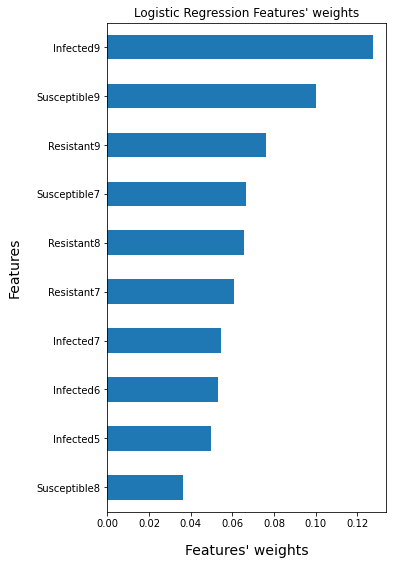

In [399]:
log_importances = pd.Series(abs(logis_reg.coef_[0]), index = train.columns)

#Sort importances
sorted_importances = log_importances.sort_values()

fig, ax = plt.subplots(figsize = (5,9))
sorted_importances.plot(kind = 'barh')
ax.set_title('Logistic Regression' + " Features' weights")
ax.set_xlabel("Features' weights", labelpad=15, size=14)
ax.set_ylabel('Features', labelpad=15, size=14)
plt.show()

In [317]:
#report the performance of the classification model on test data
train_pred_log = logis_reg.predict(train)
pred_log = logis_reg.predict(test)
#print classification report
print(classification_report(target_test,pred_log))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



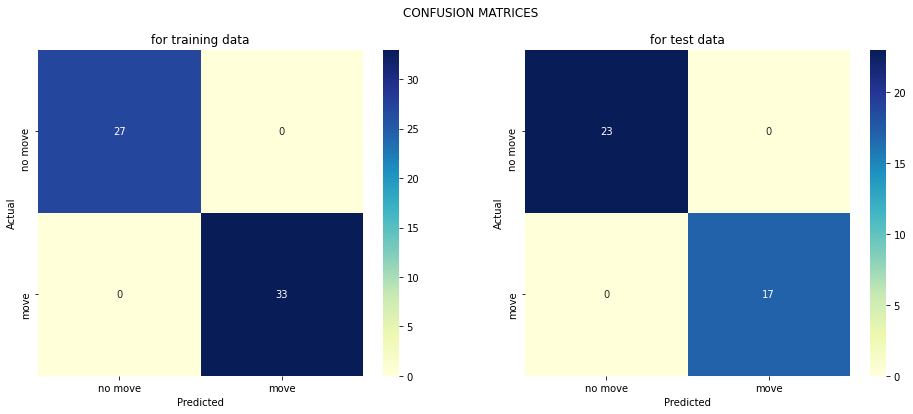

Train set accuracy:1.0000
Test set accuracy:1.0000


In [318]:
#Visualize the confusion matrix on training and test data
output_cm(target,train_pred_log,target_test,pred_log,logis_reg)

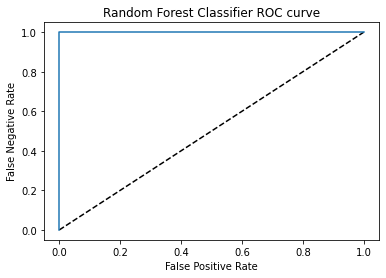

AUC is 1.0


In [380]:
# Plot the ROC curve and calculate the AUC
output_roc(logis_reg,test,target_test)

## SVM

In [335]:
param_grid = [{
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'], 
    'C': np.linspace(1e-20,1e-10,11)
}]

SVC = SVC()

grid_search = GridSearchCV(SVC, param_grid, cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(train,target)
SVC=grid_search.best_estimator_
print(grid_search.best_params_)


{'C': 1e-20, 'gamma': 'scale', 'kernel': 'linear'}


In [328]:
SVM = SVC()
SVM.fit(train,target)
SVM.predict(test) == target_test

79    True
75    True
63    True
15    True
38    True
11    True
40    True
45    True
39    True
62    True
86    True
4     True
47    True
27    True
81    True
17    True
82    True
33    True
9     True
92    True
72    True
66    True
69    True
67    True
26    True
68    True
77    True
2     True
76    True
80    True
20    True
32    True
51    True
0     True
54    True
10    True
36    True
21    True
48    True
6     True
Name: target, dtype: bool

In [336]:
#report the performance of the classification model on test data

train_pred_SVM = SVC.predict(train)
pred_SVM = SVC.predict(test)
#print classification report
print(classification_report(target_test,pred_SVM))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        23
         1.0       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40



In [359]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
print(X.shape, X_poly.shape)
print(poly.get_feature_names())

(91, 30) (91, 495)
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x0 x17', 'x0 x18', 'x0 x19', 'x0 x20', 'x0 x21', 'x0 x22', 'x0 x23', 'x0 x24', 'x0 x25', 'x0 x26', 'x0 x27', 'x0 x28', 'x0 x29', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x1 x17', 'x1 x18', 'x1 x19', 'x1 x20', 'x1 x21', 'x1 x22', 'x1 x23', 'x1 x24', 'x1 x25', 'x1 x26', 'x1 x27', 'x1 x28', 'x1 x29', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x2 x15', 'x2 x16', 'x2 x17', 'x2 x18', 'x2 x19', 'x2 x20', 'x2 x21', 'x2 x22', 'x2 x23', 

In [360]:
X_poly

array([[2.000000e+00, 5.000000e+00, 1.300000e+01, ..., 5.580090e+05,
        3.174750e+05, 1.806250e+05],
       [2.000000e+00, 2.000000e+00, 4.000000e+00, ..., 1.580049e+06,
        1.167753e+06, 8.630410e+05],
       [2.000000e+00, 6.000000e+00, 1.000000e+01, ..., 2.458624e+06,
        2.347296e+06, 2.241009e+06],
       ...,
       [2.000000e+00, 4.000000e+00, 5.000000e+00, ..., 2.576025e+06,
        2.425155e+06, 2.283121e+06],
       [2.000000e+00, 7.000000e+00, 1.400000e+01, ..., 5.285290e+05,
        2.820760e+05, 1.505440e+05],
       [2.000000e+00, 2.000000e+00, 2.000000e+00, ..., 2.449225e+06,
        2.139355e+06, 1.868689e+06]])

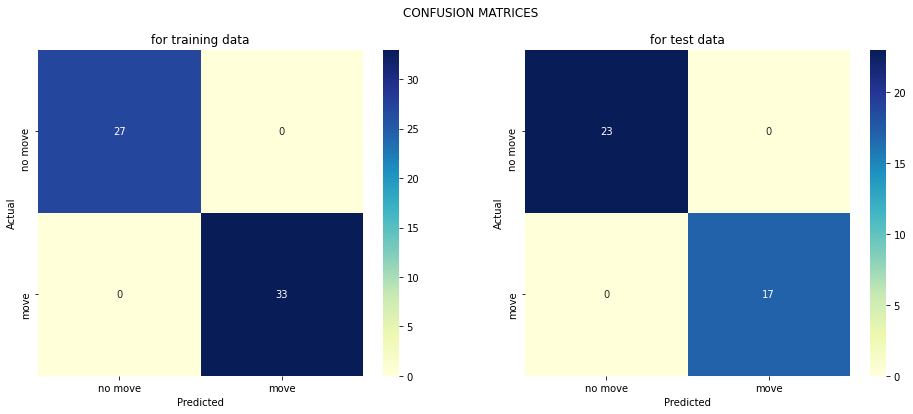

Train set accuracy:1.0000
Test set accuracy:1.0000


In [321]:
# Visualize the confusion matrix on training and test data
output_cm(target,train_pred_SVM,target_test,pred_SVM,SVC)

## KNeighborsClassifier()

In [362]:
param_grid = [{
    'n_neighbors':np.linspace(1,10,10).astype(int),
    'p' : [1,2]
}]

KNN = KNeighborsClassifier()

grid_search = GridSearchCV(KNN, param_grid, cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(train,target)
KNN =grid_search.best_estimator_
print(grid_search.best_params_)

{'n_neighbors': 1, 'p': 1}


In [363]:
KNN.effective_metric_params_

{}

In [357]:
# report the performance of the classification model on test data
train_pred_KNN = KNN.predict(train)
test_pred_KNN = KNN.predict(test)

#print classification report
print(classification_report(target_test,test_pred_KNN))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [351]:
KNN = KNeighborsClassifier()
KNN.fit(train,target)
KNN.predict(test) == target_test

79    True
75    True
63    True
15    True
38    True
11    True
40    True
45    True
39    True
62    True
86    True
4     True
47    True
27    True
81    True
17    True
82    True
33    True
9     True
92    True
72    True
66    True
69    True
67    True
26    True
68    True
77    True
2     True
76    True
80    True
20    True
32    True
51    True
0     True
54    True
10    True
36    True
21    True
48    True
6     True
Name: target, dtype: bool

## Model evaluation

In [367]:
y0 = dataset.target
X0 = dataset.drop('target',axis=1)

In [368]:
logis_reg0 = LogisticRegression()
SVC0 = SVC()
KNN0 = KNeighborsClassifier()

In [377]:
cross_val_score(logis_reg0, X, y, scoring = 'accuracy', cv = 10).mean()

0.9888888888888889

In [378]:
cross_val_score(SVC0, X, y, scoring = 'accuracy', cv = 10).mean()

0.9888888888888889

In [379]:
cross_val_score(KNN0, X, y, scoring = 'accuracy', cv = 10).mean()

0.9888888888888889

In [373]:
(logis_reg0.predict(X0) == y0).sum()

100

In [374]:
(SVC0.predict(X0) == y0).sum()

99

In [375]:
(KNN0.predict(X0) == y0).sum()

99